In [12]:
import json
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

In [25]:
def labels_from_confusion_matrix(confusion_matrix):
    y_true = (
        [1] * confusion_matrix["true_positive"] +
        [0] * confusion_matrix["true_negative"] +
        [0] * confusion_matrix["false_positive"] +
        [1] * confusion_matrix["false_negative"]
    )
    y_pred = (
        [1] * confusion_matrix["true_positive"] +
        [0] * confusion_matrix["true_negative"] +
        [1] * confusion_matrix["false_positive"] +
        [0] * confusion_matrix["false_negative"]
    )
    return y_true, y_pred


def display_confusion_matrices(performance_metrics):
    rows = 11
    cols = 3
    fig, axs = plt.subplots(rows, cols, figsize=(25, 75))

    for x in range(rows):
        for y in range(cols):
            try:
                pfile = next(performance_metrics)
                with open(pfile) as f:
                    cm = json.load(f)
                    y_true, y_pred = labels_from_confusion_matrix(cm)
                    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=axs[x,y])
                    prec, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
                    axs[x, y].set_title(f"{pfile.stem}\np: {prec:.2f}, r: {recall:.2f}, f1: {f1:.2f}")
            except StopIteration:
                fig.delaxes(axs[x, y])
    plt.show()

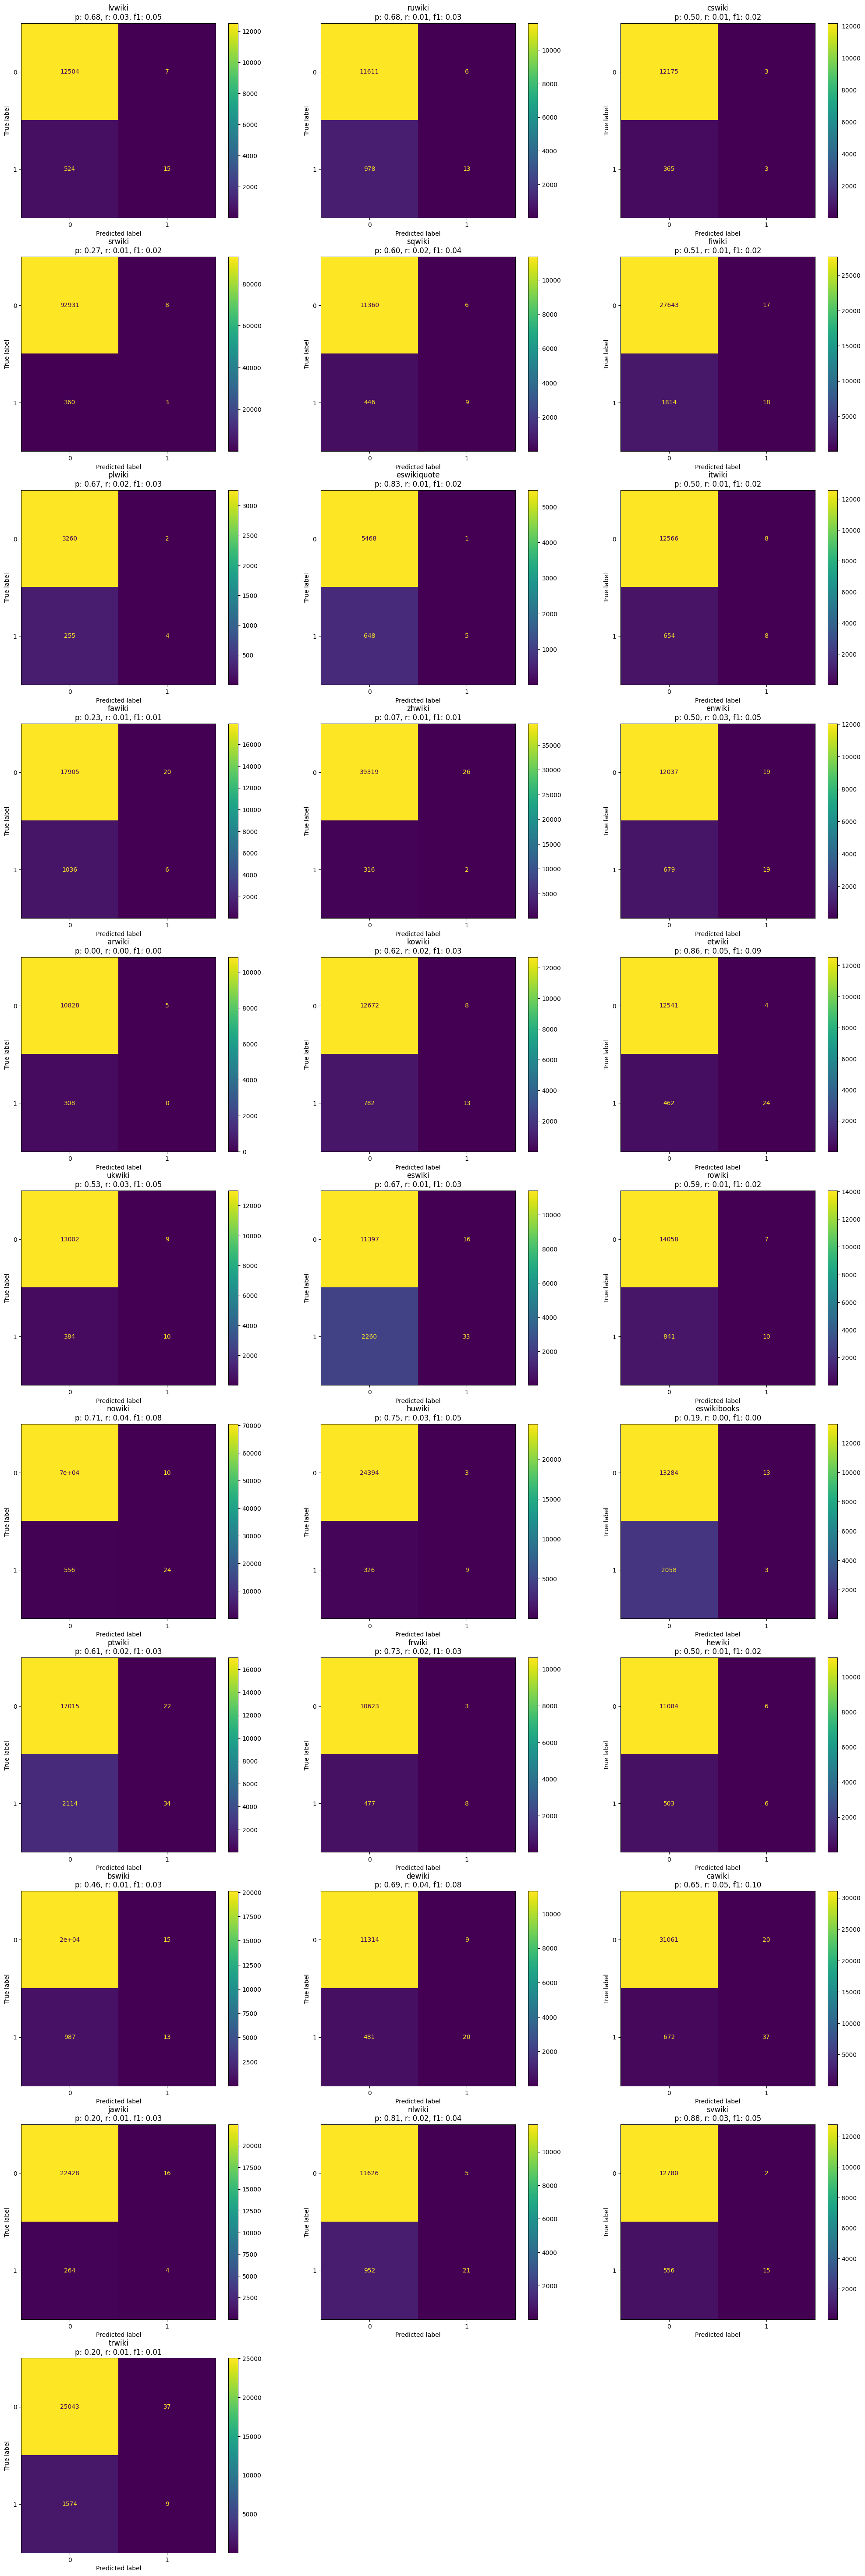

In [26]:
contents = Path("/home/mnz/vandalism/edit_vandalism_performance").glob('**/*')
performance_metrics = (x for x in contents if x.is_file())
display_confusion_matrices(performance_metrics)

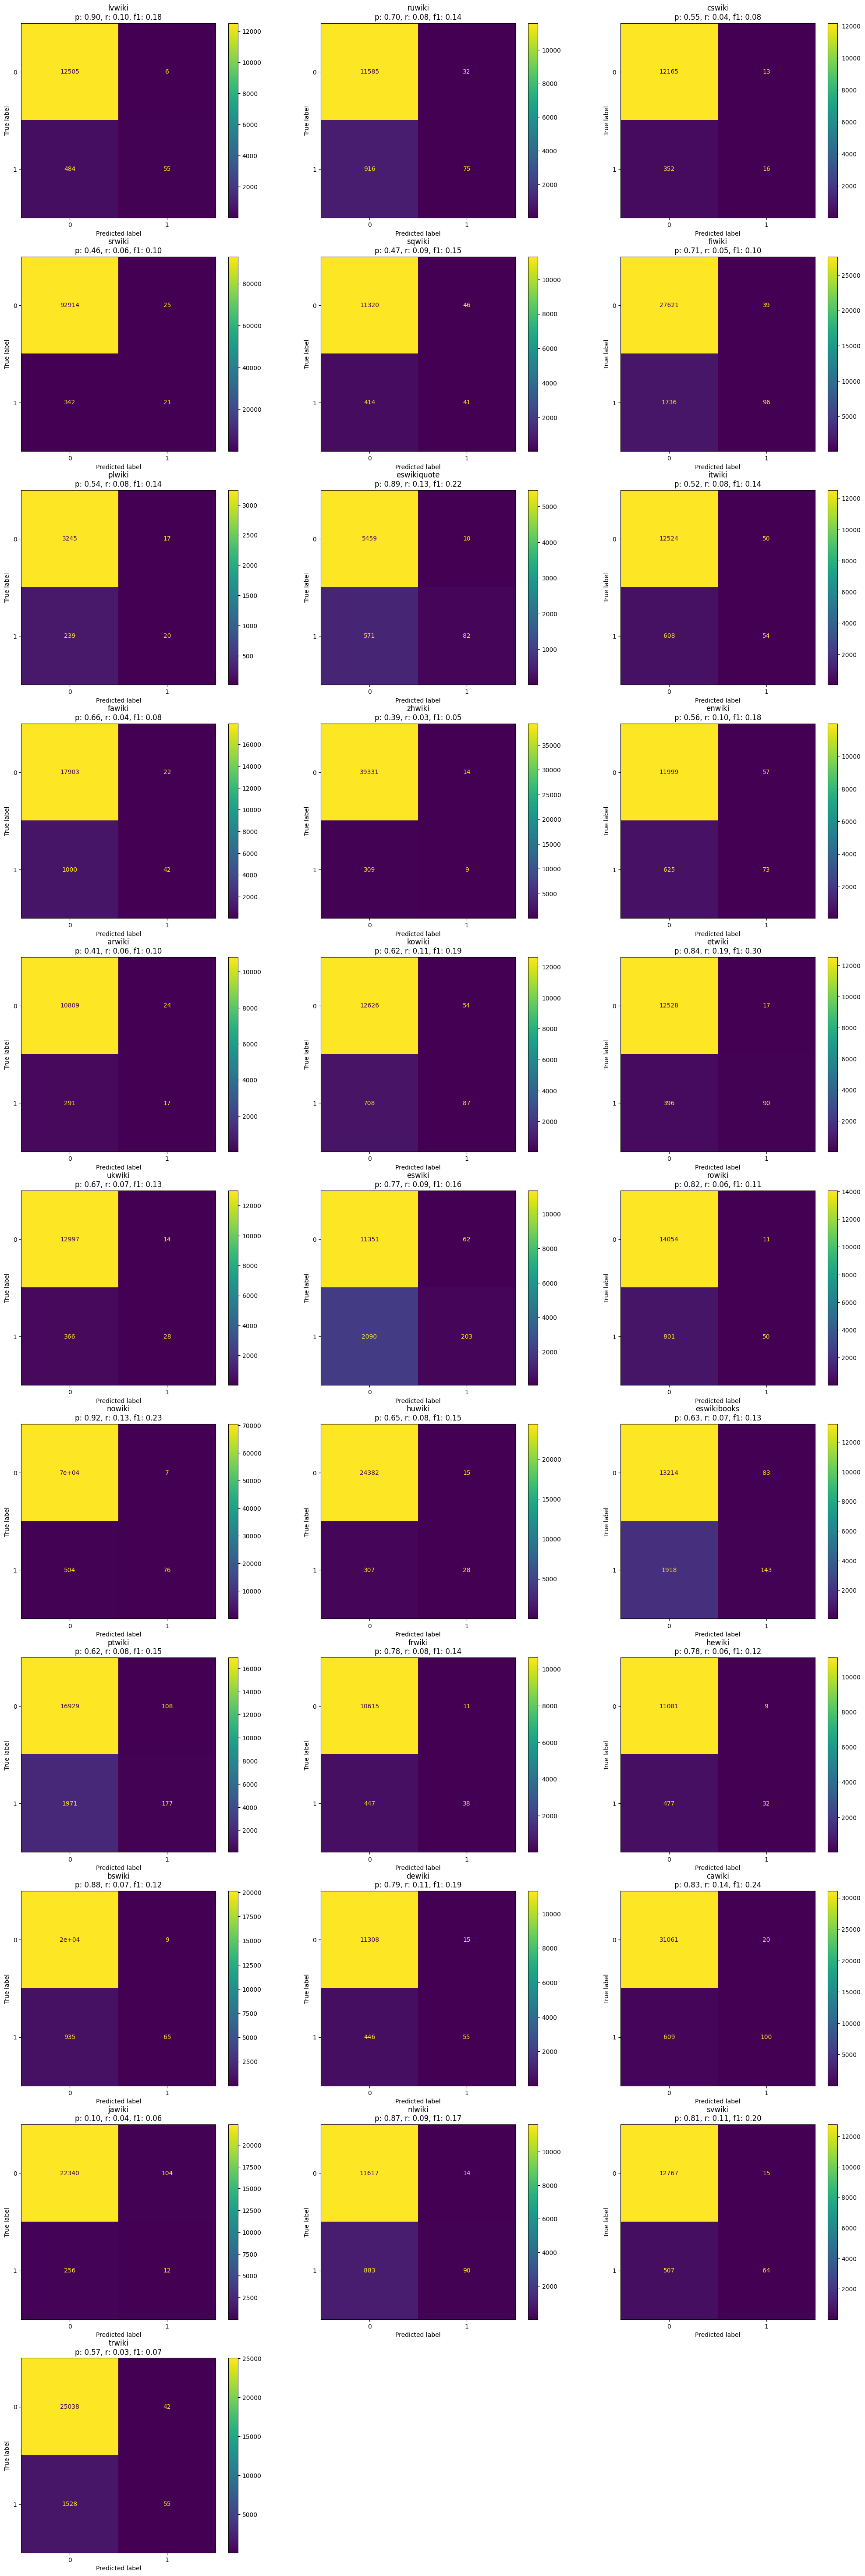

In [27]:
contents = Path("/home/mnz/vandalism/edit_vandalism_user_performance").glob('**/*')
performance_metrics = (x for x in contents if x.is_file())
display_confusion_matrices(performance_metrics)

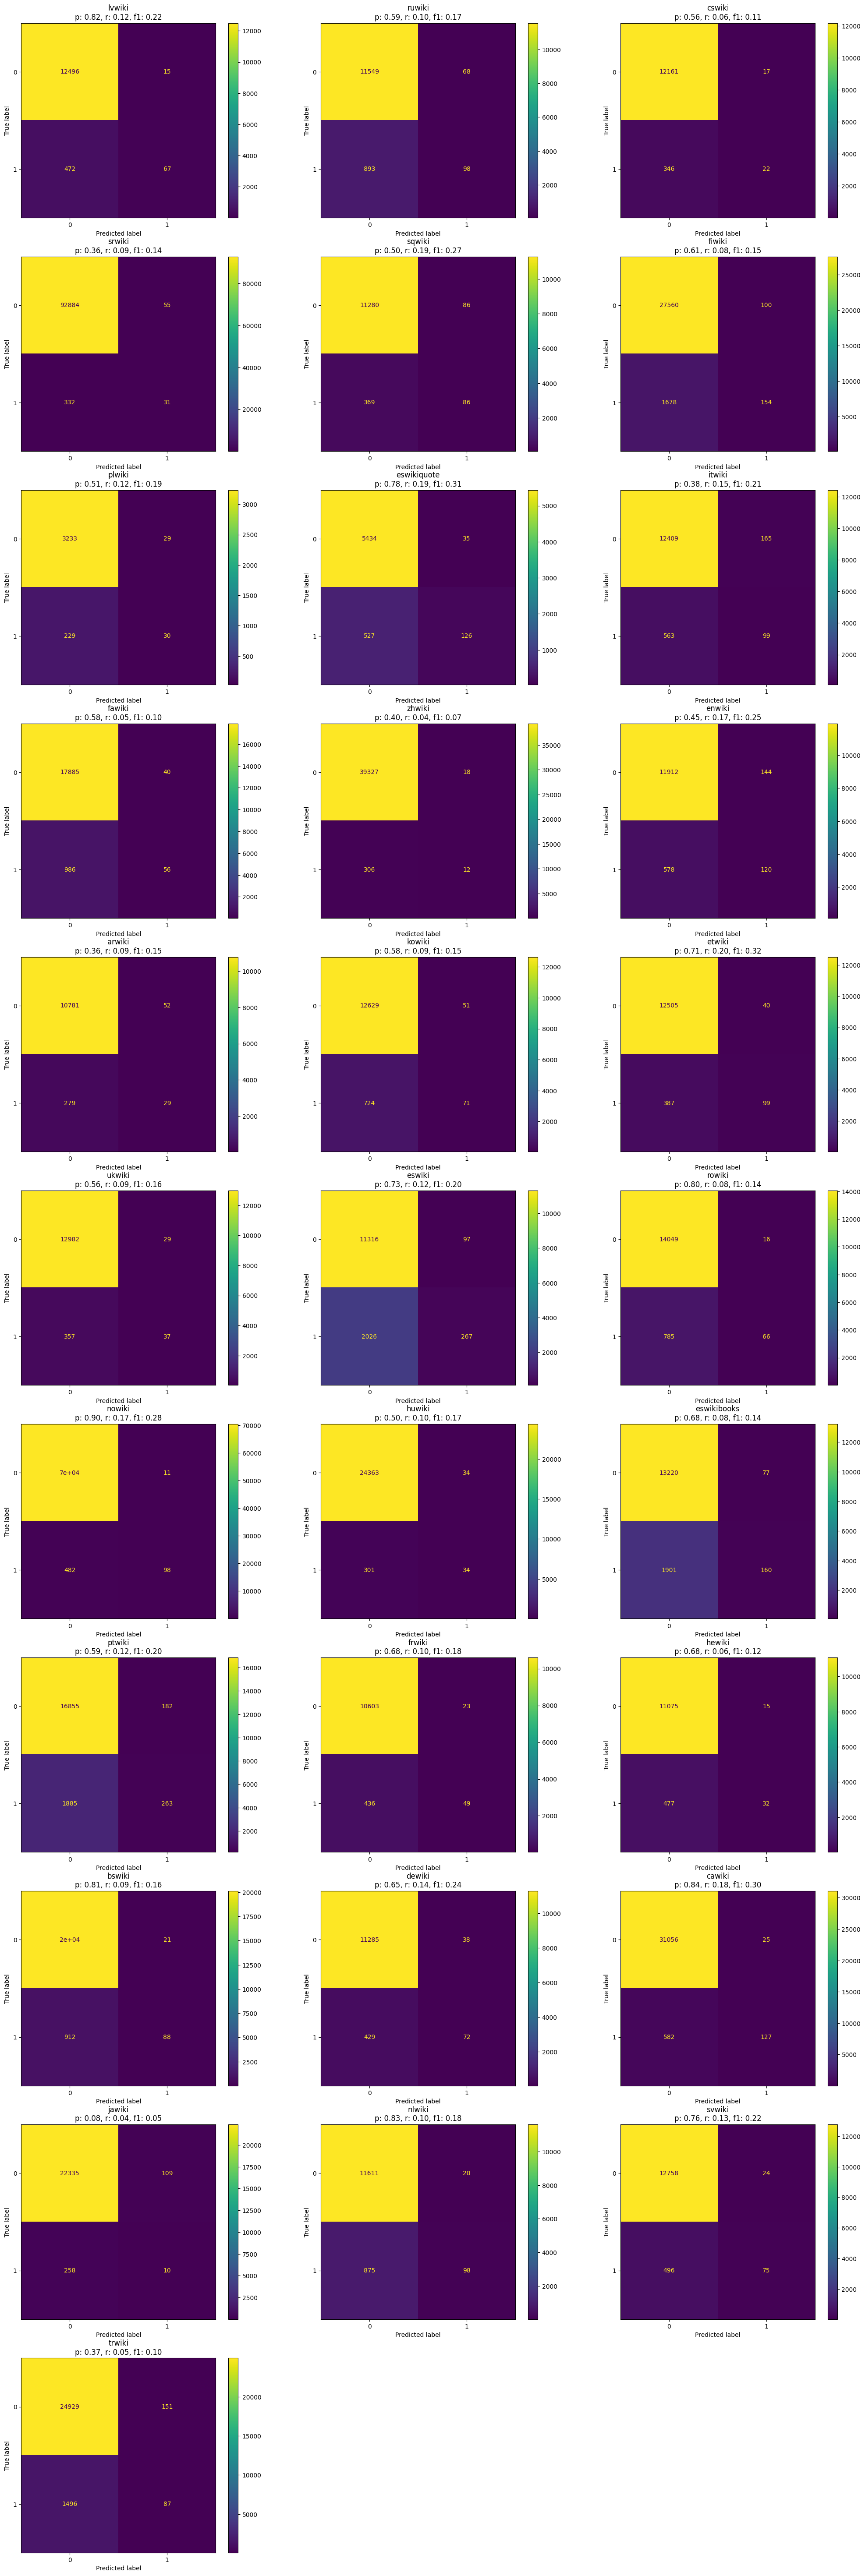

In [28]:
contents = Path("/home/mnz/vandalism/edit_vandalism_agg_performance").glob('**/*')
performance_metrics = (x for x in contents if x.is_file())
display_confusion_matrices(performance_metrics)